Loglikelihood example
===

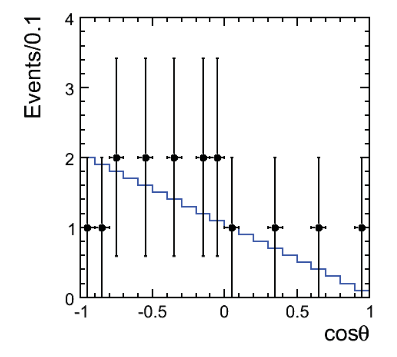

In [1]:
import ROOT as r
import numpy as np
# use static plots
%jsroot off

In [2]:
# recreate the above plot as a histogram
x=np.array([-.95,-.85,-.75,-.55,-.35,-.15,-.05,.05,.35,.65,.95])
y=np.array([1,1,2,2,2,2,2,1,1,1,1])
hdata=r.TH1F("hdata","data distibution;cos#theta;Events/0.1",20,-1,1)
hmodel=r.TH1F("hmodel","model distibution;cos#theta;Events/0.1",20,-1,1)
model=r.TF1("model","1.05-x",-1,1)
hmodel.SetLineColor(r.kRed)
for i in range(len(x)): 
    hdata.Fill(x[i],y[i])
for i in range(1,hmodel.GetNbinsX()+1):
    xi=hmodel.GetBinCenter(i)
    hmodel.Fill(xi,model.Eval(xi))

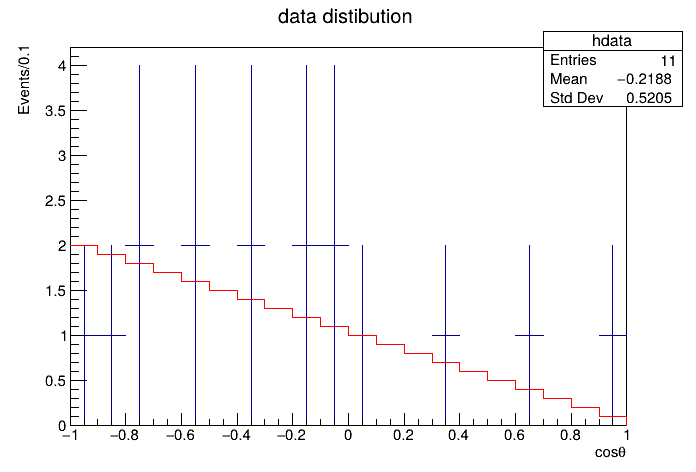

In [3]:
tc=r.TCanvas()
hdata.Draw("e")
hmodel.Draw("hist,same")
tc.Draw()

Calculation of -NLL
---

In [4]:
# both data and model are expected to be histograms here
from math import log
def calcNLL(data,model):
    NLL=0.0
    for i in range(1,data.GetNbinsX()+1):
        nExpected = model.GetBinContent(i)
        nObs = data.GetBinContent(i)
        prob = r.TMath.Poisson(nObs,nExpected)  # Poisson P(nobs; mu=nExpected)
        NLL -= log(prob)
    return NLL

In [5]:
print(f'NLL for the data and model is: {calcNLL(hdata,hmodel):0.1f}')

NLL for the data and model is: 23.4


Generate a pseudoexperiment
---

In [6]:
from math import sqrt
def makePE(model,h):
    tr=r.TRandom2(0)
    for i in range(1,h.GetNbinsX()+1):
        nExpected = model.GetBinContent(i)
        nObs = tr.Poisson(nExpected) # random pseudodata based on the model
        h.SetBinContent(i,nObs)
        h.SetBinError(i,sqrt(nObs))

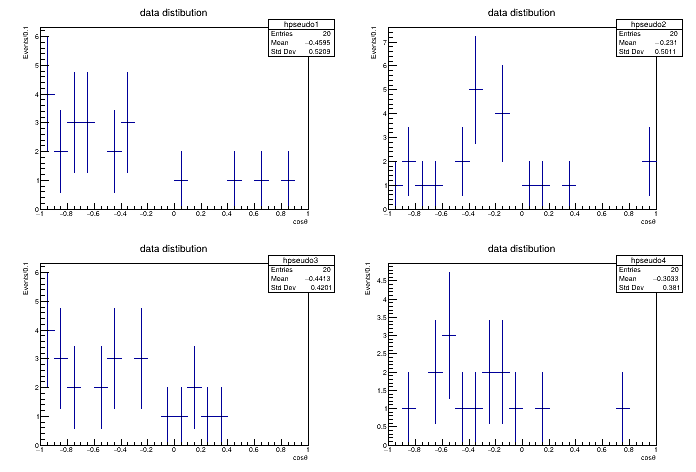

In [7]:
tc2=r.TCanvas()
tc2.Divide(2,2)
hPE=[0]*4 # histograms for pseudoexperiments
for i in range(1,5):
    hPE[i-1]=hdata.Clone(f"hpseudo{i}")
    hPE[i-1].Reset()  # clear entries to empty histogram
    makePE(hmodel,hPE[i-1])
    tc2.cd(i)
    hPE[i-1].Draw("e")
tc2.Draw()

Finally we can calculate the expected NLL distribution by histograing the NLLs for many PEs like this.  And use that distribution (intergal of NLL PDF for getting worse agreement between our data and model) to interpret the level of agreement for the NLL = 23.4 calculated above.

In [8]:
for i in range(len(hPE)):
    print ("PE NLL:",calcNLL(hPE[i],hmodel))

PE NLL: 24.744292722993347
PE NLL: 29.794345250839694
PE NLL: 23.510784266348512
PE NLL: 21.340793797895948
